# 自然语言处理应用

[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source.png)](https://gitee.com/mindspore/docs/blob/master/docs/notebook/mindspore_nlp_application.ipynb)

## Обзор

Классификация тональности представляет собой подмножество задач классификации текста при обработке естественного языка и относится к наиболее базовым приложениям обработки естественного языка. Это процесс анализа и рассуждения об эмоционально субъективных текстах, то есть анализ отношения говорящего, будь оно положительным или отрицательным.

> Обычно мы делим категории эмоций на положительные, отрицательные и нейтральные. Хоть и много «безликих» комментариев, но чаще всего для обучения используются только положительные и отрицательные кейсы, и следующий набор данных является хорошим примером.

Типичным справочным набором данных для традиционной задачи классификации текстовых тем является [20 групп новостей] (http://qwone.com/~jason/20Newsgroups/), который состоит из 20 групп новостных данных и содержит около 20 000 новостных документов.
Некоторые категории данных в тематическом списке относительно схожи, например, comp.sys.ibm.pc.hardware и comp.sys.mac.hardware — это темы, связанные с аппаратным обеспечением компьютерных систем, и их сходство относительно велико. Некоторые тематические категории имеют относительно несвязанные данные, такие как misc.forsale и soc.religion.christian.

Что касается самой сети, то сетевая структура классификации текстовых тем примерно аналогична структуре классификации настроений. После того, как вы освоите построение сети классификации настроений, легко построить аналогичную сеть, которую можно использовать для задач классификации текстовых тем с небольшой настройкой параметров.

Но с точки зрения бизнес-контекста классификация тем текста предназначена для анализа объективного содержания текстовых обсуждений, в то время как классификация настроений предназначена для получения информации из текста о том, поддерживает ли он определенную точку зрения. Например, «Форрест Гамп» действительно красив, тема фильма ясна, ритм плавный». и классификация эмоций должна быть раскопана, является ли этот отзыв положительным или отрицательным.

По сравнению с традиционной классификацией текстовых тем, классификация настроений проще и практичнее. Обычные веб-сайты для покупок и веб-сайты с фильмами могут собирать наборы данных относительно высокого качества, которые могут легко принести пользу бизнес-сфере. Например, он может автоматически анализировать мнения конкретных типов клиентов о текущем продукте в сочетании с контекстом домена, а также анализировать настроения по темам и типам пользователей для целевой обработки и даже дополнительно рекомендовать продукты на основе этого, улучшая конверсию. скорость, и принести больше выгоды высокая прибыль бизнеса.

В специальных полях некоторые неполярные слова также полностью выражают эмоциональные тенденции пользователя, например, при загрузке и использовании приложения «зависание» и «загрузка слишком медленная» выражают негативные эмоциональные тенденции пользователей; " и "бычий рынок" выражают положительные эмоциональные тенденции пользователей. Итак, по сути, мы надеемся, что модель сможет откопать некоторые специальные выражения в вертикальном поле и использовать их в качестве полярных слов для системы классификации настроений:

$вертикальное полярное слово = общее полярное слово + полярное слово для предметной области$

В зависимости от детализации обработки текста анализ тональности можно разделить на несколько уровней исследования, таких как уровень слова, уровень фразы, уровень предложения, уровень абзаца и уровень главы. Взяв здесь в качестве примера «уровень абзаца», входные данные — это абзацы, а выходные данные — это информация о том, является ли обзор фильма положительным или отрицательным.

Затем в качестве примера возьмем классификацию настроений обзоров фильмов IMDB, чтобы испытать применение MindSpore в обработке естественного языка.

## Общий процесс

1. Подготовка.
2. Загрузите набор данных и выполните обработку данных.
3. Определите сеть.
4. Определите оптимизатор и функцию потерь.
5. Используйте данные обучения сети для создания модели.
6. После получения модели используйте проверочный набор данных, чтобы проверить точность модели.

> Этот процесс взаимодействия поддерживает среду CPU или GPU, но среда Ascend в настоящее время не поддерживается.

## Подготовка

### Скачать набор данных

Этот опыт использует набор данных обзора фильмов IMDB в качестве экспериментальных данных.

1. Загрузите набор данных обзора фильмов IMDB.

     Ниже приведены примеры отрицательных и положительных отзывов.

    | Review  | Label  |
    |:---|:---:|
    | "Quitting" may be as much about exiting a pre-ordained identity as about drug withdrawal. As a rural guy coming to Beijing, class and success must have struck this young artist face on as an appeal to separate from his roots and far surpass his peasant parents' acting success. Troubles arise, however, when the new man is too new, when it demands too big a departure from family, history, nature, and personal identity. The ensuing splits, and confusion between the imaginary and the real and the dissonance between the ordinary and the heroic are the stuff of a gut check on the one hand or a complete escape from self on the other.  |  Negative |  
    | This movie is amazing because the fact that the real people portray themselves and their real life experience and do such a good job it's like they're almost living the past over again. Jia Hongsheng plays himself an actor who quit everything except music and drugs struggling with depression and searching for the meaning of life while being angry at everyone especially the people who care for him most.  | Positive  |

    将下载好的数据集解压并放在当前工作目录下的`datasets`目录下，由于数据集文件较多，解压过程耗时大约15分钟。以下示例代码将数据集下载并解压到指定位置。

In [ ]:
!pip install mindspore==1.5
!pip install tqdm
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77.0 MB 17 kB/s 
     |████████████████████████████████| 281 kB 39.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm

In [ ]:
import os
import requests
import tarfile
import zipfile

requests.packages.urllib3.disable_warnings()
from tqdm import tqdm

def download_dataset(url, target_path):
    """下载并解压数据集"""
    if not os.path.exists(target_path):
        os.makedirs(target_path)
    download_file = url.split("/")[-1]
    if not os.path.exists(download_file):
        res = requests.get(url, stream=True, verify=False)
        if download_file.split(".")[-1] not in ["tgz", "zip", "tar", "gz"]:
            download_file = os.path.join(target_path, download_file)
        with open(download_file, "wb") as f:
            for chunk in tqdm(res.iter_content(chunk_size=512)):
                if chunk:
                    f.write(chunk)
    if download_file.endswith("zip"):
        z = zipfile.ZipFile(download_file, "r")
        z.extractall(path=target_path)
        z.close()
    if download_file.endswith(".tar.gz") or download_file.endswith(".tar") or download_file.endswith(".tgz"):
        with tarfile.open(download_file) as t:
            names = t.getnames()
            for name in tqdm(names):
                t.extract(name, target_path)

In [ ]:
download_dataset("https://mindspore-website.obs.myhuaweicloud.com/notebook/datasets/aclImdb_v1.tar.gz", "./datasets")

164309it [00:09, 17480.33it/s]
100%|██████████| 100019/100019 [08:57<00:00, 186.05it/s]


2. Загрузите файл GloVe.
     Загрузите и разархивируйте файлы GloVe в каталог `datasets` в текущем рабочем каталоге и добавьте новую строку, как показано ниже, в начале всех файлов GloVe, что означает, что всего читается 400 000 слов, и каждое слово использует 300-мерный словесный векторный экспресс.

     ````
     400000 300
     ````

In [ ]:
def add_first_line(file, line):
    with open(file, "r+") as f:
        data = f.read()
        f.seek(0, 0)
        f.write(line+data)

download_dataset("https://mindspore-website.obs.myhuaweicloud.com/notebook/datasets/glove.6B.zip", "./datasets/glove")
os.makedirs("./preprocess", exist_ok=True)
os.makedirs("./ckpt", exist_ok=True)
glove_f = [os.path.join("./datasets/glove", i) for i in os.listdir("./datasets/glove")]
[add_first_line(i, "400000 300\n") for i in tqdm(glove_f)]

1683951it [01:13, 23010.12it/s]
100%|██████████| 4/4 [00:24<00:00,  6.08s/it]


[None, None, None, None]

3. Создайте пустой каталог с именем `preprocess` в текущем рабочем каталоге, который будет использоваться для хранения файлов, преобразованных из набора данных IMDB в формат MindRecord в операции предварительной обработки набора данных. Текущая структура рабочего каталога выглядит следующим образом.
    ```text
    .
    ├── aclImdb_v1.tar.gz
    ├── ckpt
    ├── datasets
    │   ├── aclImdb
    │   │   ├── imdbEr.txt
    │   │   ├── imdb.vocab
    │   │   ├── README
    │   │   ├── test
    │   │   └── train
    │   └── glove
    │       ├── glove.6B.100d.txt
    │       ├── glove.6B.200d.txt
    │       ├── glove.6B.300d.txt
    │       └── glove.6B.50d.txt
    ├── glove.6B.zip
    ├── nlp_application.ipynb
    └── preprocess
    ```

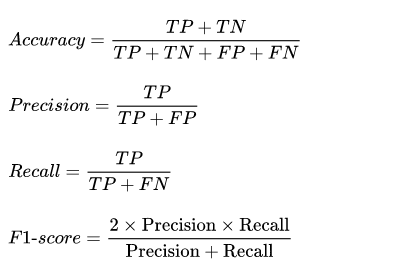

### Определяем критерии оценки

Как типичная проблема классификации, критерии оценки классификации настроений могут обрабатываться так же, как и обычные задачи классификации. В качестве эталона можно использовать общую точность (Accuracy), точность (Precision), скорость отзыва (Recall) и показатель F_beta.

$Точность = количество правильно классифицированных образцов/общее количество образцов$

$Precision = количество истинно положительных образцов / количество положительных образцов для всех предсказанных классов $

$ Recall = количество истинно положительных образцов / количество положительных образцов для всех истинных классов $

Оценка $F1 = (2*Точность*Отзыв) / (Точность+Отзыв)$

В наборе данных IMDB количество положительных и отрицательных выборок не сильно отличается, и точность можно просто использовать как меру классификатора.

### Определить сеть

Мы используем сеть SentimentNet, построенную на LSTM, для обработки естественного языка.

> Сеть LSTM (долгосрочная кратковременная память) — это временная рекуррентная нейронная сеть, подходящая для обработки и прогнозирования важных событий с очень большими интервалами и задержками во временных рядах.
> Этот опыт предназначен для аппаратных платформ GPU или CPU.

### 配置运行信息和SentimentNet网络参数

1. Используйте модуль `parser`, чтобы передать необходимую информацию для запуска.

     - `preprocess`: нужно ли предварительно обрабатывать набор данных, по умолчанию нет.
     - `aclimdb_path`: путь, по которому хранится набор данных.
     - `glove_path`: путь, по которому хранятся файлы GloVe.
     - `preprocess_path`: папка результатов предварительно обработанного набора данных.
     - `ckpt_path`: путь к файлу контрольной точки.
     - `pre_trained`: предварительно загрузить файлы CheckPoint.
     - `device_target`: указывает среду GPU или CPU.

2. Перед обучением необходимо настроить необходимую информацию, в том числе информацию об окружении, режиме выполнения, серверной информации и информации об оборудовании.

Запустите следующий код, чтобы настроить соответствующие параметры, необходимые для обучения (подробную информацию о настройке интерфейса см. в описании API-интерфейса `set_context` на официальном сайте MindSpore).

In [ ]:
import argparse
from mindspore.context import set_context, get_context, GRAPH_MODE
from easydict import EasyDict as edict


# LSTM CONFIG
lstm_cfg = edict({
    'num_classes': 2,
    'learning_rate': 0.1,
    'momentum': 0.9,
    'num_epochs': 10,
    'batch_size': 64,
    'embed_size': 300,
    'num_hiddens': 100,
    'num_layers': 2,
    'bidirectional': True,
    'save_checkpoint_steps': 390,
    'keep_checkpoint_max': 10
})

cfg = lstm_cfg

parser = argparse.ArgumentParser(description='MindSpore LSTM Example')
parser.add_argument('--preprocess', type=str, default='false', choices=['true', 'false'],
                    help='whether to preprocess data.')
parser.add_argument('--aclimdb_path', type=str, default="./datasets/aclImdb",
                    help='path where the dataset is stored.')
parser.add_argument('--glove_path', type=str, default="./datasets/glove",
                    help='path where the GloVe is stored.')
parser.add_argument('--preprocess_path', type=str, default="./preprocess",
                    help='path where the pre-process data is stored.')
parser.add_argument('--ckpt_path', type=str, default="./models/ckpt/nlp_application",
                    help='the path to save the checkpoint file.')
parser.add_argument('--pre_trained', type=str, default=None,
                    help='the pretrained checkpoint file path.')
parser.add_argument('--device_target', type=str, default="GPU", choices=['GPU', 'CPU'],
                    help='the target device to run, support "GPU", "CPU". Default: "CPU".')
args = parser.parse_args(['--device_target', 'CPU', '--preprocess', 'true'])

set_context(
    mode=GRAPH_MODE,
    save_graphs=False,
    device_target=args.device_target)

print("Current context loaded:\n    mode: {}\n    device_target: {}".format(get_context("mode"),
                                                                            get_context("device_target")))

Current context loaded:
    mode: 0
    device_target: CPU


### Обработка данных

#### Предварительная обработка набора данных

Выполните предварительную обработку набора данных:

- Определите класс `ImdbParser` для анализа текстовых наборов данных, включая кодирование, токенизацию, выравнивание, обработку необработанных данных GloVe и обеспечение их адаптации к сетевой структуре.
- Определите функцию `convert_to_mindrecord` для преобразования формата набора данных в формат MindRecord, удобный для чтения MindSpore. `weight.txt` в функции `_convert_to_mindrecord` представляет собой файл информации о параметрах веса, автоматически сгенерированный после предварительной обработки данных.
- Вызовите функцию `convert_to_mindrecord`, чтобы выполнить предварительную обработку набора данных.

In [ ]:
import os
from itertools import chain
import numpy as np
import gensim
from mindspore.mindrecord import FileWriter


class ImdbParser():
    """
    parse aclImdb data to features and labels.
    sentence->tokenized->encoded->padding->features
    """

    def __init__(self, imdb_path, glove_path, embed_size=300):
        self.__segs = ['train', 'test']
        self.__label_dic = {'pos': 1, 'neg': 0}
        self.__imdb_path = imdb_path
        self.__glove_dim = embed_size
        self.__glove_file = os.path.join(glove_path, 'glove.6B.' + str(self.__glove_dim) + 'd.txt')

        # properties
        self.__imdb_datas = {}
        self.__features = {}
        self.__labels = {}
        self.__vacab = {}
        self.__word2idx = {}
        self.__weight_np = {}
        self.__wvmodel = None

    def parse(self):
        """
        parse imdb data to memory
        """
        self.__wvmodel = gensim.models.KeyedVectors.load_word2vec_format(self.__glove_file)

        for seg in self.__segs:
            self.__parse_imdb_datas(seg)
            self.__parse_features_and_labels(seg)
            self.__gen_weight_np(seg)

    def __parse_imdb_datas(self, seg):
        """
        load data from txt
        """
        data_lists = []
        for label_name, label_id in self.__label_dic.items():
            sentence_dir = os.path.join(self.__imdb_path, seg, label_name)
            for file in os.listdir(sentence_dir):
                with open(os.path.join(sentence_dir, file), mode='r', encoding='utf8') as f:
                    sentence = f.read().replace('\n', '')
                    data_lists.append([sentence, label_id])
        self.__imdb_datas[seg] = data_lists

    def __parse_features_and_labels(self, seg):
        """
        parse features and labels
        """
        features = []
        labels = []
        for sentence, label in self.__imdb_datas[seg]:
            features.append(sentence)
            labels.append(label)

        self.__features[seg] = features
        self.__labels[seg] = labels

        # update feature to tokenized
        self.__updata_features_to_tokenized(seg)
        # parse vacab
        self.__parse_vacab(seg)
        # encode feature
        self.__encode_features(seg)
        # padding feature
        self.__padding_features(seg)

    def __updata_features_to_tokenized(self, seg):
        tokenized_features = []
        for sentence in self.__features[seg]:
            tokenized_sentence = [word.lower() for word in sentence.split(" ")]
            tokenized_features.append(tokenized_sentence)
        self.__features[seg] = tokenized_features

    def __parse_vacab(self, seg):
        # vocab
        tokenized_features = self.__features[seg]
        vocab = set(chain(*tokenized_features))
        self.__vacab[seg] = vocab

        # word_to_idx: {'hello': 1, 'world':111, ... '<unk>': 0}
        word_to_idx = {word: i + 1 for i, word in enumerate(vocab)}
        word_to_idx['<unk>'] = 0
        self.__word2idx[seg] = word_to_idx

    def __encode_features(self, seg):
        """ encode word to index """
        word_to_idx = self.__word2idx['train']
        encoded_features = []
        for tokenized_sentence in self.__features[seg]:
            encoded_sentence = []
            for word in tokenized_sentence:
                encoded_sentence.append(word_to_idx.get(word, 0))
            encoded_features.append(encoded_sentence)
        self.__features[seg] = encoded_features

    def __padding_features(self, seg, maxlen=500, pad=0):
        """ pad all features to the same length """
        padded_features = []
        for feature in self.__features[seg]:
            if len(feature) >= maxlen:
                padded_feature = feature[:maxlen]
            else:
                padded_feature = feature
                while len(padded_feature) < maxlen:
                    padded_feature.append(pad)
            padded_features.append(padded_feature)
        self.__features[seg] = padded_features

    def __gen_weight_np(self, seg):
        """
        generate weight by gensim
        """
        weight_np = np.zeros((len(self.__word2idx[seg]), self.__glove_dim), dtype=np.float32)
        for word, idx in self.__word2idx[seg].items():
            if word not in self.__wvmodel:
                continue
            word_vector = self.__wvmodel.get_vector(word)
            weight_np[idx, :] = word_vector

        self.__weight_np[seg] = weight_np

    def get_datas(self, seg):
        """
        return features, labels, and weight
        """
        features = np.array(self.__features[seg]).astype(np.int32)
        labels = np.array(self.__labels[seg]).astype(np.int32)
        weight = np.array(self.__weight_np[seg])
        return features, labels, weight



def _convert_to_mindrecord(data_home, features, labels, weight_np=None, training=True):
    """
    convert imdb dataset to mindrecoed dataset
    """
    if weight_np is not None:
        np.savetxt(os.path.join(data_home, 'weight.txt'), weight_np)

    # write mindrecord
    schema_json = {"id": {"type": "int32"},
                   "label": {"type": "int32"},
                   "feature": {"type": "int32", "shape": [-1]}}

    data_dir = os.path.join(data_home, "aclImdb_train.mindrecord")
    if not training:
        data_dir = os.path.join(data_home, "aclImdb_test.mindrecord")

    def get_imdb_data(features, labels):
        data_list = []
        for i, (label, feature) in enumerate(zip(labels, features)):
            data_json = {"id": i,
                         "label": int(label),
                         "feature": feature.reshape(-1)}
            data_list.append(data_json)
        return data_list

    writer = FileWriter(data_dir, shard_num=4)
    data = get_imdb_data(features, labels)
    writer.add_schema(schema_json, "nlp_schema")
    writer.add_index(["id", "label"])
    writer.write_raw_data(data)
    writer.commit()


def convert_to_mindrecord(embed_size, aclimdb_path, preprocess_path, glove_path):
    """
    convert imdb dataset to mindrecoed dataset
    """
    parser = ImdbParser(aclimdb_path, glove_path, embed_size)
    parser.parse()

    if not os.path.exists(preprocess_path):
        print(f"preprocess path {preprocess_path} is not exist")
        os.makedirs(preprocess_path)

    train_features, train_labels, train_weight_np = parser.get_datas('train')
    _convert_to_mindrecord(preprocess_path, train_features, train_labels, train_weight_np)

    test_features, test_labels, _ = parser.get_datas('test')
    _convert_to_mindrecord(preprocess_path, test_features, test_labels, training=False)

if args.preprocess == "true":
    os.system("rm -f ./preprocess/aclImdb* weight*")
    print("============== Starting Data Pre-processing ==============")
    convert_to_mindrecord(cfg.embed_size, args.aclimdb_path, args.preprocess_path, args.glove_path)
    print("======================= Successful =======================")

============== Starting Data Pre-processing ==============
======================= Successful =======================


После успешного преобразования в каталоге `preprocess` будет сгенерирован файл MindRecord. Обычно, когда набор данных остается неизменным, эту операцию не нужно выполнять при каждом обучении. Вы можете пропустить ее, установив `--preprocess false ` при выполнении сценария. Просмотрите структуру каталогов файлов `preprocess`.

```text
preprocess
├── aclImdb_test.mindrecord0
├── aclImdb_test.mindrecord0.db
├── aclImdb_test.mindrecord1
├── aclImdb_test.mindrecord1.db
├── aclImdb_test.mindrecord2
├── aclImdb_test.mindrecord2.db
├── aclImdb_test.mindrecord3
├── aclImdb_test.mindrecord3.db
├── aclImdb_train.mindrecord0
├── aclImdb_train.mindrecord0.db
├── aclImdb_train.mindrecord1
├── aclImdb_train.mindrecord1.db
├── aclImdb_train.mindrecord2
├── aclImdb_train.mindrecord2.db
├── aclImdb_train.mindrecord3
├── aclImdb_train.mindrecord3.db
└── weight.txt
```

На данный момент файлы в каталоге `preprocess`:

- Набор обучающих данных в преобразованном формате MindRecord, имя которого содержит `aclImdb_train.mindrecord`.
- Тестовые наборы данных в преобразованном формате MindRecord, имена которых содержат `aclImdb_test.mindrecord`.
- `weight.txt` - это файл информации о параметрах веса, автоматически сгенерированный после предварительной обработки.

Создайте тренировочный набор:

- Определите функцию `lstm_create_dataset`, чтобы создать набор данных для создания обучающего набора `ds_train`.
- Создайте итератор словаря с помощью метода create_dict_iterator для чтения данных в созданном наборе данных ds_train.

Запустите следующий фрагмент кода, чтобы создать набор данных и прочитать список данных «метки» в 1-м «пакете» и «функции» данных для 1-го элемента в 1-м «пакете».

In [ ]:
import os
import mindspore.dataset as ds


def lstm_create_dataset(data_home, batch_size, repeat_num=1, training=True):
    """Data operations."""
    ds.config.set_seed(1)
    data_dir = os.path.join(data_home, "aclImdb_train.mindrecord0")
    if not training:
        data_dir = os.path.join(data_home, "aclImdb_test.mindrecord0")

    data_set = ds.MindDataset(data_dir, columns_list=["feature", "label"], num_parallel_workers=2)

    # apply map operations on images
    data_set = data_set.shuffle(buffer_size=data_set.get_dataset_size())
    data_set = data_set.batch(batch_size=batch_size, drop_remainder=True)
    data_set = data_set.repeat(count=repeat_num)

    return data_set

ds_train = lstm_create_dataset(args.preprocess_path, cfg.batch_size)

iterator = next(ds_train.create_dict_iterator())
first_batch_label = iterator["label"].asnumpy()
first_batch_first_feature = iterator["feature"].asnumpy()[0]

The first batch contains label below:
[0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0]

The feature of the first item in the first batch is below vector:
[ 73704  73939 103536  55305  17626  51536  28128 162089 174306  58034
  53953 137565 150655 165358  84324 184172 118746  48494  14313 216022
 199538  55305 170389    499 152521 240281 108431 120182 214350 165936
  22858 224272 251744 152419 176785 160751 178521  97009  73704  34941
 224272  21016 120182  70421 197257 109794 107502 120182 181952  53953
  96562  87495 197257 102107 248292  35706 233878 152466 130392  55305
   1682  68522 115665 122583  37404  56835 224272  53813 130055 175969
 131414 197257 135904 100427 137092 130392 237481 183601 197257 168631
 224272 184246  43442 138424    499 183495 115665 205713  53458 173547
 147093 112168 152466 193381  69067  22316  10467 214350    499  84278
  35034  33900  35323 244876  55305 173995  52746 2242

## Определим сеть

1. Импортируйте модули, необходимые для инициализации сети.
2. Определите тип устройства, для которого требуется стекирование одноуровневых небольших операторов LSTM.
3. Определите функцию `lstm_default_state` для инициализации сетевых параметров и состояния сети.
4. Определите функцию `stack_lstm_default_state` для инициализации параметров сети инициализации и состояния сети, требуемых стеком небольших операторов.
5. Для сценариев CPU настройте стек одноуровневых малых операторов LSTM, чтобы реализовать функцию большого многоуровневого оператора LSTM.
6. Используя метод `Cell`, определите структуру сети (сеть `SentimentNet`).
7. Создайте экземпляр `SentimentNet`, создайте сеть и, наконец, выведите параметры, загруженные в сеть.

In [ ]:
import math
import numpy as np
from mindspore import Tensor, nn, Parameter, ParameterTuple
from mindspore.context import get_context
from mindspore.common.initializer import initializer
import mindspore.ops as ops

STACK_LSTM_DEVICE = ["CPU"]

# Initialize short-term memory (h) and long-term memory (c) to 0
def lstm_default_state(batch_size, hidden_size, num_layers, bidirectional):
    """init default input."""
    num_directions = 2 if bidirectional else 1
    h = Tensor(np.zeros((num_layers * num_directions, batch_size, hidden_size)).astype(np.float32))
    c = Tensor(np.zeros((num_layers * num_directions, batch_size, hidden_size)).astype(np.float32))
    return h, c

def stack_lstm_default_state(batch_size, hidden_size, num_layers, bidirectional):
    """init default input."""
    num_directions = 2 if bidirectional else 1

    h_list = c_list = []
    for _ in range(num_layers):
        h_list.append(Tensor(np.zeros((num_directions, batch_size, hidden_size)).astype(np.float32)))
        c_list.append(Tensor(np.zeros((num_directions, batch_size, hidden_size)).astype(np.float32)))
    h, c = tuple(h_list), tuple(c_list)
    return h, c


class StackLSTM(nn.Cell):
    """
    Stack multi-layers LSTM together.
    """

    def __init__(self,
                 input_size,
                 hidden_size,
                 num_layers=1,
                 has_bias=True,
                 batch_first=False,
                 dropout=0.0,
                 bidirectional=False):
        super(StackLSTM, self).__init__()
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.transpose = ops.Transpose()

        # direction number
        num_directions = 2 if bidirectional else 1

        # input_size list
        input_size_list = [input_size]
        for i in range(num_layers - 1):
            input_size_list.append(hidden_size * num_directions)

        # layers
        layers = []
        for i in range(num_layers):
            layers.append(nn.LSTMCell(input_size=input_size_list[i],
                                      hidden_size=hidden_size,
                                      has_bias=has_bias,
                                      batch_first=batch_first,
                                      bidirectional=bidirectional,
                                      dropout=dropout))

        # weights
        weights = []
        for i in range(num_layers):
            # weight size
            weight_size = (input_size_list[i] + hidden_size) * num_directions * hidden_size * 4
            if has_bias:
                bias_size = num_directions * hidden_size * 4
                weight_size = weight_size + bias_size

            # numpy weight
            stdv = 1 / math.sqrt(hidden_size)
            w_np = np.random.uniform(-stdv, stdv, (weight_size, 1, 1)).astype(np.float32)

            # lstm weight
            weights.append(Parameter(initializer(Tensor(w_np), w_np.shape), name="weight" + str(i)))

        #
        self.lstms = layers
        self.weight = ParameterTuple(tuple(weights))

    def construct(self, x, hx):
        """construct"""
        if self.batch_first:
            x = self.transpose(x, (1, 0, 2))
        # stack lstm
        h, c = hx
        hn = cn = None
        for i in range(self.num_layers):
            x, hn, cn, _, _ = self.lstms[i](x, h[i], c[i], self.weight[i])
        if self.batch_first:
            x = self.transpose(x, (1, 0, 2))
        return x, (hn, cn)


class SentimentNet(nn.Cell):
    """Sentiment network structure."""

    def __init__(self,
                 vocab_size,
                 embed_size,
                 num_hiddens,
                 num_layers,
                 bidirectional,
                 num_classes,
                 weight,
                 batch_size):
        super(SentimentNet, self).__init__()
        # Mapp words to vectors
        self.embedding = nn.Embedding(vocab_size,
                                      embed_size,
                                      embedding_table=weight)
        self.embedding.embedding_table.requires_grad = False
        self.trans = ops.Transpose()
        self.perm = (1, 0, 2)

        if get_context("device_target") in STACK_LSTM_DEVICE:
            # stack lstm by user
            self.encoder = StackLSTM(input_size=embed_size,
                                     hidden_size=num_hiddens,
                                     num_layers=num_layers,
                                     has_bias=True,
                                     bidirectional=bidirectional,
                                     dropout=0.0)
            self.h, self.c = stack_lstm_default_state(batch_size, num_hiddens, num_layers, bidirectional)
        else:
            # standard lstm
            self.encoder = nn.LSTM(input_size=embed_size,
                                   hidden_size=num_hiddens,
                                   num_layers=num_layers,
                                   has_bias=True,
                                   bidirectional=bidirectional,
                                   dropout=0.0)
            self.h, self.c = lstm_default_state(batch_size, num_hiddens, num_layers, bidirectional)

        self.concat = ops.Concat(1)
        if bidirectional:
            self.decoder = nn.Dense(num_hiddens * 4, num_classes)
        else:
            self.decoder = nn.Dense(num_hiddens * 2, num_classes)

    def construct(self, inputs):
        # input：(64,500,300)
        embeddings = self.embedding(inputs)
        embeddings = self.trans(embeddings, self.perm)
        output, _ = self.encoder(embeddings, (self.h, self.c))
        # states[i] size(64,200)  -> encoding.size(64,400)
        encoding = self.concat((output[0], output[499]))
        outputs = self.decoder(encoding)
        return outputs

embedding_table = np.loadtxt(os.path.join(args.preprocess_path, "weight.txt")).astype(np.float32)
network = SentimentNet(vocab_size=embedding_table.shape[0],
                       embed_size=cfg.embed_size,
                       num_hiddens=cfg.num_hiddens,
                       num_layers=cfg.num_layers,
                       bidirectional=cfg.bidirectional,
                       num_classes=cfg.num_classes,
                       weight=Tensor(embedding_table),
                       batch_size=cfg.batch_size)

print(network.parameters_dict(recurse=True))

OrderedDict([('embedding.embedding_table', Parameter (name=embedding.embedding_table, shape=(252193, 300), dtype=Float32, requires_grad=False)), ('encoder.weight0', Parameter (name=encoder.weight0, shape=(320800, 1, 1), dtype=Float32, requires_grad=True)), ('encoder.weight1', Parameter (name=encoder.weight1, shape=(240800, 1, 1), dtype=Float32, requires_grad=True)), ('decoder.weight', Parameter (name=decoder.weight, shape=(2, 400), dtype=Float32, requires_grad=True)), ('decoder.bias', Parameter (name=decoder.bias, shape=(2,), dtype=Float32, requires_grad=True))])


## Обучить и сохранить модель

Запустите следующий код, чтобы создать оптимизатор и модель функции потерь, загрузите обучающий набор данных (`ds_train`) и настройте CheckPoint для генерации информации, а затем используйте интерфейс model.train для обучения модели. По выходным данным видно, что значение потерь постепенно уменьшается с обучением и, наконец, достигает примерно 0,262.

In [10]:
from mindspore import Model
from mindspore.train.callback import CheckpointConfig, ModelCheckpoint, TimeMonitor, LossMonitor
from mindspore.nn import Accuracy
from mindspore import nn

os.system("rm -f {0}/*.ckpt {0}/*.meta".format(args.ckpt_path))
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
opt = nn.Momentum(network.trainable_params(), cfg.learning_rate, cfg.momentum)
model = Model(network, loss, opt, {'acc': Accuracy()})
loss_cb = LossMonitor(per_print_times=78)
print("============== Starting Training ==============")
config_ck = CheckpointConfig(save_checkpoint_steps=cfg.save_checkpoint_steps,
                             keep_checkpoint_max=cfg.keep_checkpoint_max)
ckpoint_cb = ModelCheckpoint(prefix="lstm", directory=args.ckpt_path, config=config_ck)
time_cb = TimeMonitor(data_size=ds_train.get_dataset_size())
if args.device_target == "CPU":
    model.train(cfg.num_epochs, ds_train, callbacks=[time_cb, ckpoint_cb, loss_cb], dataset_sink_mode=False)
else:
    model.train(cfg.num_epochs, ds_train, callbacks=[time_cb, ckpoint_cb, loss_cb])
print("============== Training Success ==============")

============== Starting Training ==============
epoch: 1 step: 78, loss is 0.68990105
epoch: 1 step: 156, loss is 0.6607322
epoch: 1 step: 234, loss is 0.6768051
epoch: 1 step: 312, loss is 0.5804778
epoch: 1 step: 390, loss is 0.57390904
epoch time: 940850.415 ms, per step time: 2412.437 ms
epoch: 2 step: 78, loss is 0.6918031
epoch: 2 step: 156, loss is 0.6077039
epoch: 2 step: 234, loss is 0.6924745
epoch: 2 step: 312, loss is 0.63778096
epoch: 2 step: 390, loss is 0.6355504
epoch time: 949443.798 ms, per step time: 2434.471 ms
epoch: 3 step: 78, loss is 0.6125942
epoch: 3 step: 156, loss is 0.53423905
epoch: 3 step: 234, loss is 0.41319418
epoch: 3 step: 312, loss is 0.35350835
epoch: 3 step: 390, loss is 0.42095977
epoch time: 936889.035 ms, per step time: 2402.280 ms
epoch: 4 step: 78, loss is 0.46229306
epoch: 4 step: 156, loss is 0.40603283
epoch: 4 step: 234, loss is 0.38807216
epoch: 4 step: 312, loss is 0.41566047
epoch: 4 step: 390, loss is 0.365918
epoch time: 936843.687 m

## Тестирование модели

Создайте и загрузите набор данных проверки (`ds_eval`), загрузите файл CheckPoint, сохраненный **train**, выполните проверку и проверьте качество модели. Этот шаг занимает около 30 секунд.

In [12]:
from mindspore import load_checkpoint, load_param_into_net
args.ckpt_path_saved = f'{args.ckpt_path}/lstm-{cfg.num_epochs}_390.ckpt'
print("============== Starting Testing ==============")
ds_eval = lstm_create_dataset(args.preprocess_path, cfg.batch_size, training=False)
param_dict = load_checkpoint(args.ckpt_path_saved)
load_param_into_net(network, param_dict)
if args.device_target == "CPU":
    acc = model.eval(ds_eval, dataset_sink_mode=False)
else:
    acc = model.eval(ds_eval)
print("============== {} ==============".format(acc))


============== Starting Testing ==============
============== {'acc': 0.8496794871794872} ==============


### Оценка результатов обучения

В соответствии с выводом приведенного выше кода видно, что после 10  эпох правильный уровень анализа тональности текста составляет около 85% с использованием проверенного набора данных, что в основном является удовлетворительным результатом.